In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
import missingno as msno
import sys
warnings.filterwarnings('ignore')

In [71]:
root = "/Users/afei/PycharmProjects/MLProject/Project_1/telco-churn-prediction-main/telco-churn-prediction-main"
path = os.path.join(root, "telco.csv")
# read data
data = pd.read_csv(path)

In [72]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [73]:
data.shape

(7043, 21)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [75]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [76]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [77]:
data.drop('customerID',axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<Axes: >

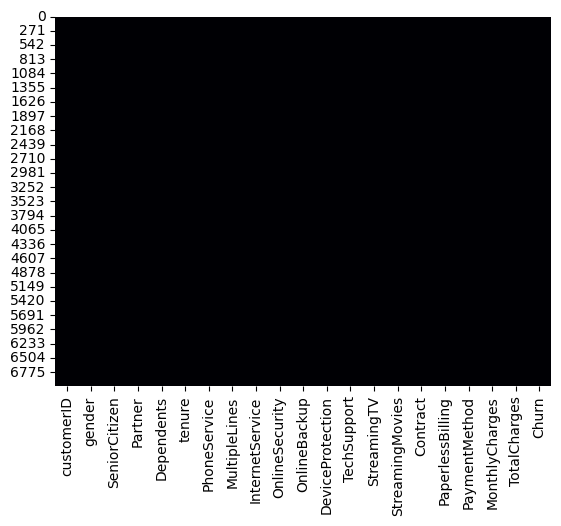

In [78]:
sns.heatmap(data.isnull(),cmap='magma',cbar=False)

In [79]:
# totalcharge  you缺失值“ ” 
l1 = [len(i.split()) for i in data['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i]!=1]
print(l2)
for i in l2:
    data.loc[i,'TotalCharges'] = data.loc[i,'MonthlyCharges']
    

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]


In [80]:
for i in l2:
    print(data.loc[i,'MonthlyCharges'],data.loc[i,"TotalCharges"])

52.55 52.55
20.25 20.25
80.85 80.85
25.75 25.75
56.05 56.05
19.85 19.85
25.35 25.35
20.0 20.0
19.7 19.7
73.35 73.35
61.9 61.9


In [81]:
data.drop(columns = ['customerID'], inplace = True)

In [82]:
data['TotalCharges'] = data['TotalCharges'].apply(pd.to_numeric, errors='coerce') 

In [83]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


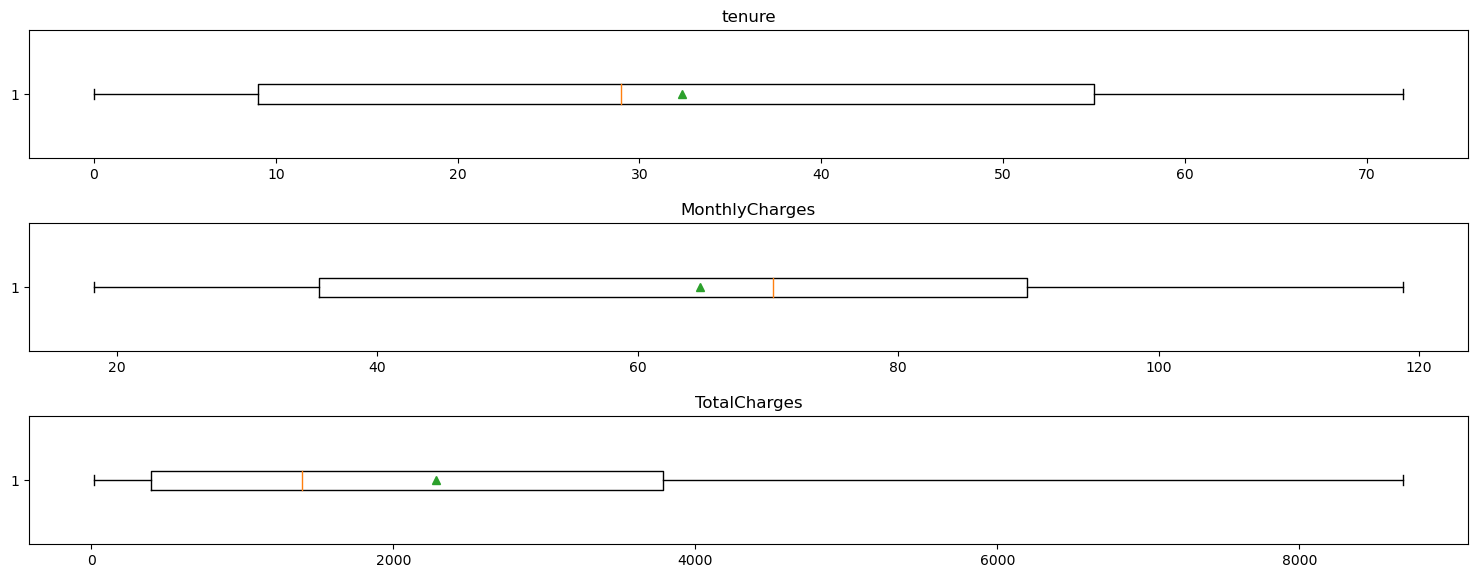

In [87]:
%matplotlib inline
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(311)
list1 = list(data['tenure'])
ax1.boxplot(list1,vert=False,showmeans=True)
ax1.set_title("tenure")

# MonthlyCharges特征
ax2 = fig.add_subplot(312)    # 子图2
list2 = list(data['MonthlyCharges'])
ax2.boxplot(list2, vert=False, showmeans=True, flierprops = {"marker":"o","markerfacecolor":"steelblue"})
ax2.set_title('MonthlyCharges')

# TotalCharges
ax3 = fig.add_subplot(313)    # 子图3
list3 = list(data['TotalCharges'])
ax3.boxplot(list3, vert=False, showmeans=True, flierprops = {"marker":"o","markerfacecolor":"steelblue"})
ax3.set_title('TotalCharges')

plt.tight_layout(pad=1.5)    # 设置子图之间的间距
plt.show() # 展示箱型图

<Axes: >

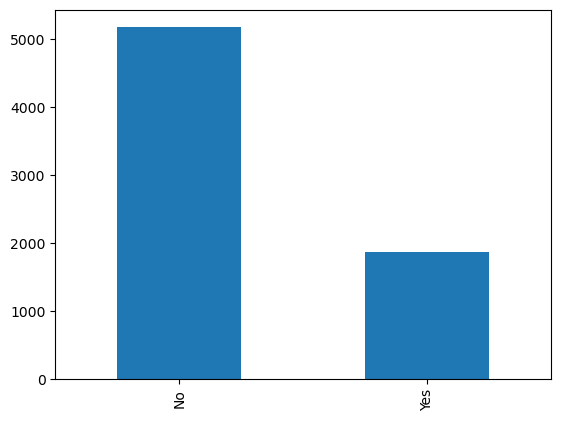

In [89]:
data.Churn.value_counts().plot(kind="bar")

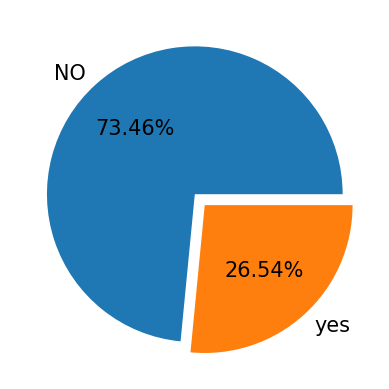

In [90]:
p = data.Churn.value_counts()
patch,l_text,p_text = plt.pie(p,labels=['NO','yes'],autopct='%1.2f%%',explode=(0,0.1))
for t in p_text:
    t.set_size(15)
for t in l_text:
    t.set_size(15)
    
plt.show()    # 展示图像

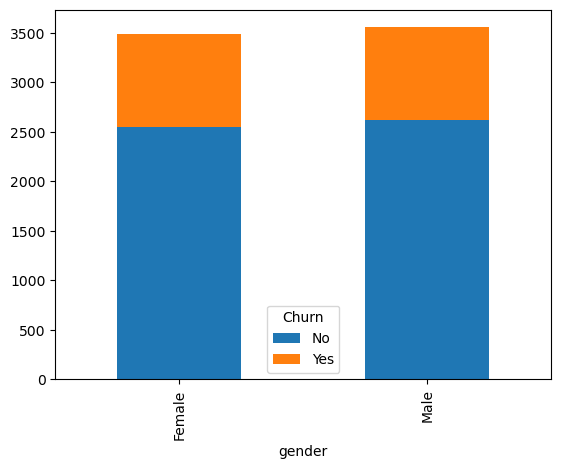

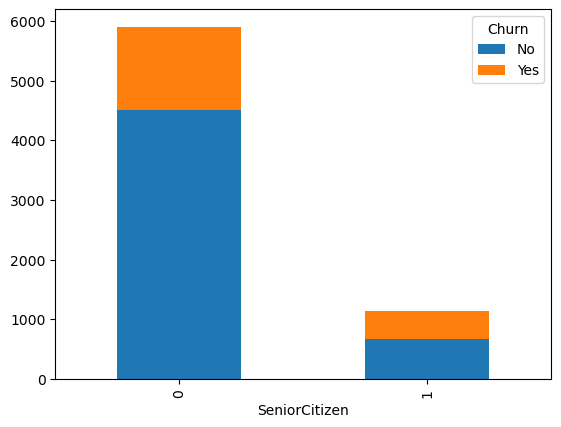

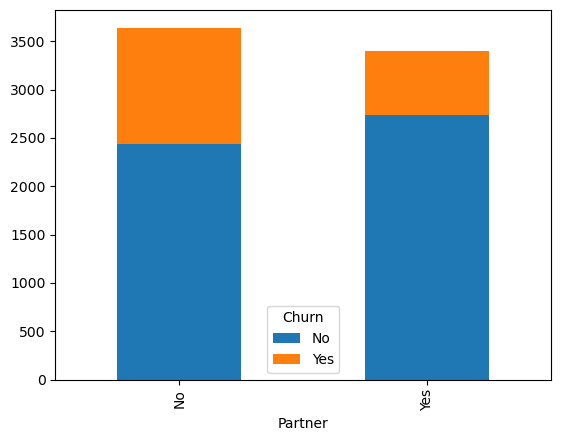

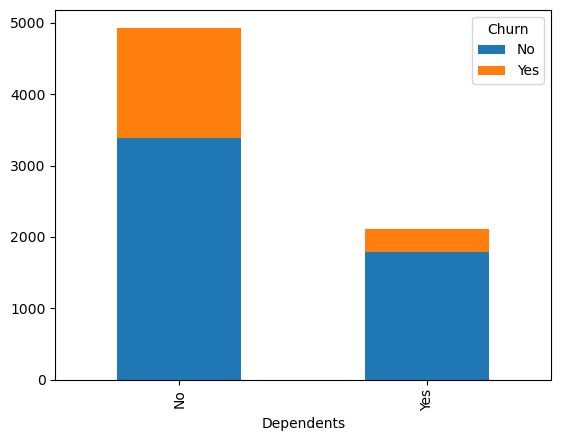

In [91]:
# 用户画像分析
cls = ['gender','SeniorCitizen',"Partner","Dependents"]
for i in cls:
    cnt = pd.crosstab(data[i],data["Churn"])
    cnt.plot.bar(stacked=True)
    plt.show()

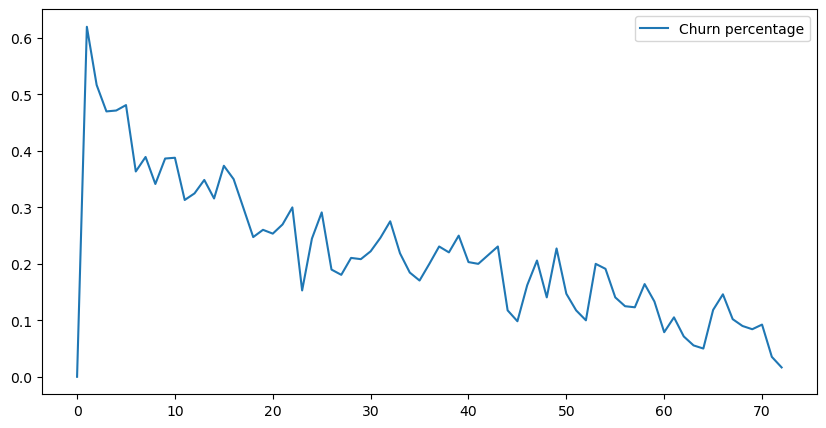

In [96]:
### 观察流失率与入网月数的关系
# 折线图
groupDf = data[['tenure', 'Churn']]    # 只需要用到两列数据
# print(groupDf)
groupDf['Churn'] = groupDf['Churn'].map({'Yes': 1, 'No': 0})    # 将正负样本目标变量改为1和0方便计算
pctDf = groupDf.groupby(['tenure']).sum() / groupDf.groupby(['tenure']).count()    # 计算不同入网月数对应的流失率
# print(pctDf)
pctDf = pctDf.reset_index()    # 将索引变成列

plt.figure(figsize=(10, 5))
plt.plot(pctDf['tenure'], pctDf['Churn'], label='Churn percentage')    # 绘制折线图
plt.legend()    # 显示图例
plt.show()